In [211]:
# !pip3 install garminconnect

In [212]:
import garminconnect
from getpass import getpass
from datetime import date, timedelta
import os
from notion_client import Client

In [213]:
# import logging
# logging.basicConfig(level=logging.DEBUG)

In [225]:
email = 'enter your email here'
password = 'enter your password here'

garmin = garminconnect.Garmin(email, password)

In [12]:
garmin.login()

True

In [8]:
today = date.today()
today = today.isoformat()

# FETCHING YOUR DATA

In [15]:
%%time
import pandas as pd
from datetime import datetime, timedelta

def fetch_garmin_data(start_date: str, end_date: str):
    """
    Fetch Garmin data for each date between start_date and end_date.
    If no data is available ('totalSteps' is None), append null values for that day.
    
    Parameters:
    - start_date: str in 'YYYY-MM-DD' format
    - end_date: str in 'YYYY-MM-DD' format
    
    Returns:
    - DataFrame containing Garmin data for each day.
    """
    
    # Create an empty list to hold all daily data
    data_list = []
    
    # Convert start and end dates to datetime objects
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')
    
    # Initialize current_date with start_date
    current_date = start_date
    
    # Loop through each day between start_date and end_date
    while current_date <= end_date:
        # Convert the current date to the required format (YYYY-MM-DD)
        date_str = current_date.strftime('%Y-%m-%d')
        
        # Fetch the data from Garmin API
        daily_data = garmin.get_stats(date_str)  # Assuming garmin.get_stats(date_str) works
        
        # If 'totalSteps' is None, that means no data for the day
        if daily_data.get('totalSteps') is None:
            # Add an empty row for the date with 'None' values
            empty_data = {key: None for key in daily_data.keys()}
            empty_data['calendarDate'] = date_str  # Set the date for the empty row
            data_list.append(empty_data)
        else:
            # Append the actual data for the date
            data_list.append(daily_data)
        
        # Move to the next day
        current_date += timedelta(days=1)
    
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data_list)
    
    return df

CPU times: user 15 µs, sys: 33 µs, total: 48 µs
Wall time: 66.3 µs


filtering all the data since start of 2024

In [17]:
%%time

# Usage:
start_date = "2024-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date in 'YYYY-MM-DD' format

# Fetch data from Garmin API and convert it into a DataFrame
garmin_data_df = fetch_garmin_data(start_date, end_date)

# Display the DataFrame
garmin_data_df.head()

CPU times: user 1.47 s, sys: 270 ms, total: 1.74 s
Wall time: 1min 36s


,userProfileId,totalKilocalories,activeKilocalories,bmrKilocalories,wellnessKilocalories,burnedKilocalories,consumedKilocalories,remainingKilocalories,totalSteps,netCalorieGoal,...,latestSpo2ReadingTimeLocal,averageMonitoringEnvironmentAltitude,restingCaloriesFromActivity,avgWakingRespirationValue,highestRespirationValue,lowestRespirationValue,latestRespirationValue,latestRespirationTimeGMT,displayName,respirationAlgorithmVersion
0,94760815.0,2214.0,66.0,2148.0,2214.0,None,None,2214.0,2078.0,None,...,None,None,72.0,14.0,24.0,10.0,14.0,2024-01-01T18:30:00.0,NaN,NaN
1,94760815.0,2191.0,43.0,2148.0,2191.0,None,None,2191.0,2042.0,None,...,None,None,NaN,14.0,23.0,11.0,13.0,2024-01-02T18:30:00.0,NaN,NaN
2,94760815.0,2446.0,298.0,2148.0,2446.0,None,None,2446.0,3897.0,None,...,None,None,191.0,14.0,19.0,9.0,15.0,2024-01-03T18:30:00.0,NaN,NaN
3,94760815.0,2177.0,29.0,2148.0,2177.0,None,None,2177.0,1501.0,None,...,None,None,NaN,14.0,20.0,11.0,14.0,2024-01-04T18:30:00.0,NaN,NaN
4,94760815.0,2174.0,26.0,2148.0,2174.0,None,None,2174.0,1528.0,None,...,None,None,NaN,14.0,20.0,11.0,14.0,2024-01-05T18:30:00.0,NaN,NaN


In [21]:
garmin_data_df.columns

Index(['userProfileId', 'totalKilocalories', 'activeKilocalories',
       'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories',
       'consumedKilocalories', 'remainingKilocalories', 'totalSteps',
       'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters',
       'wellnessActiveKilocalories', 'netRemainingKilocalories',
       'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal',
       'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt',
       'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription',
       'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds',
       'sleepingSeconds', 'includesWellnessData', 'includesActivityData',
       'includesCalorieConsumedData', 'privacyProtected',
       'moderateIntensityMinutes', 'vigorousIntensityMinutes',
       'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended',
       'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal',

In [18]:
df = garmin_data_df

### 1. Effect of High Step Count on Resting Heart Rate

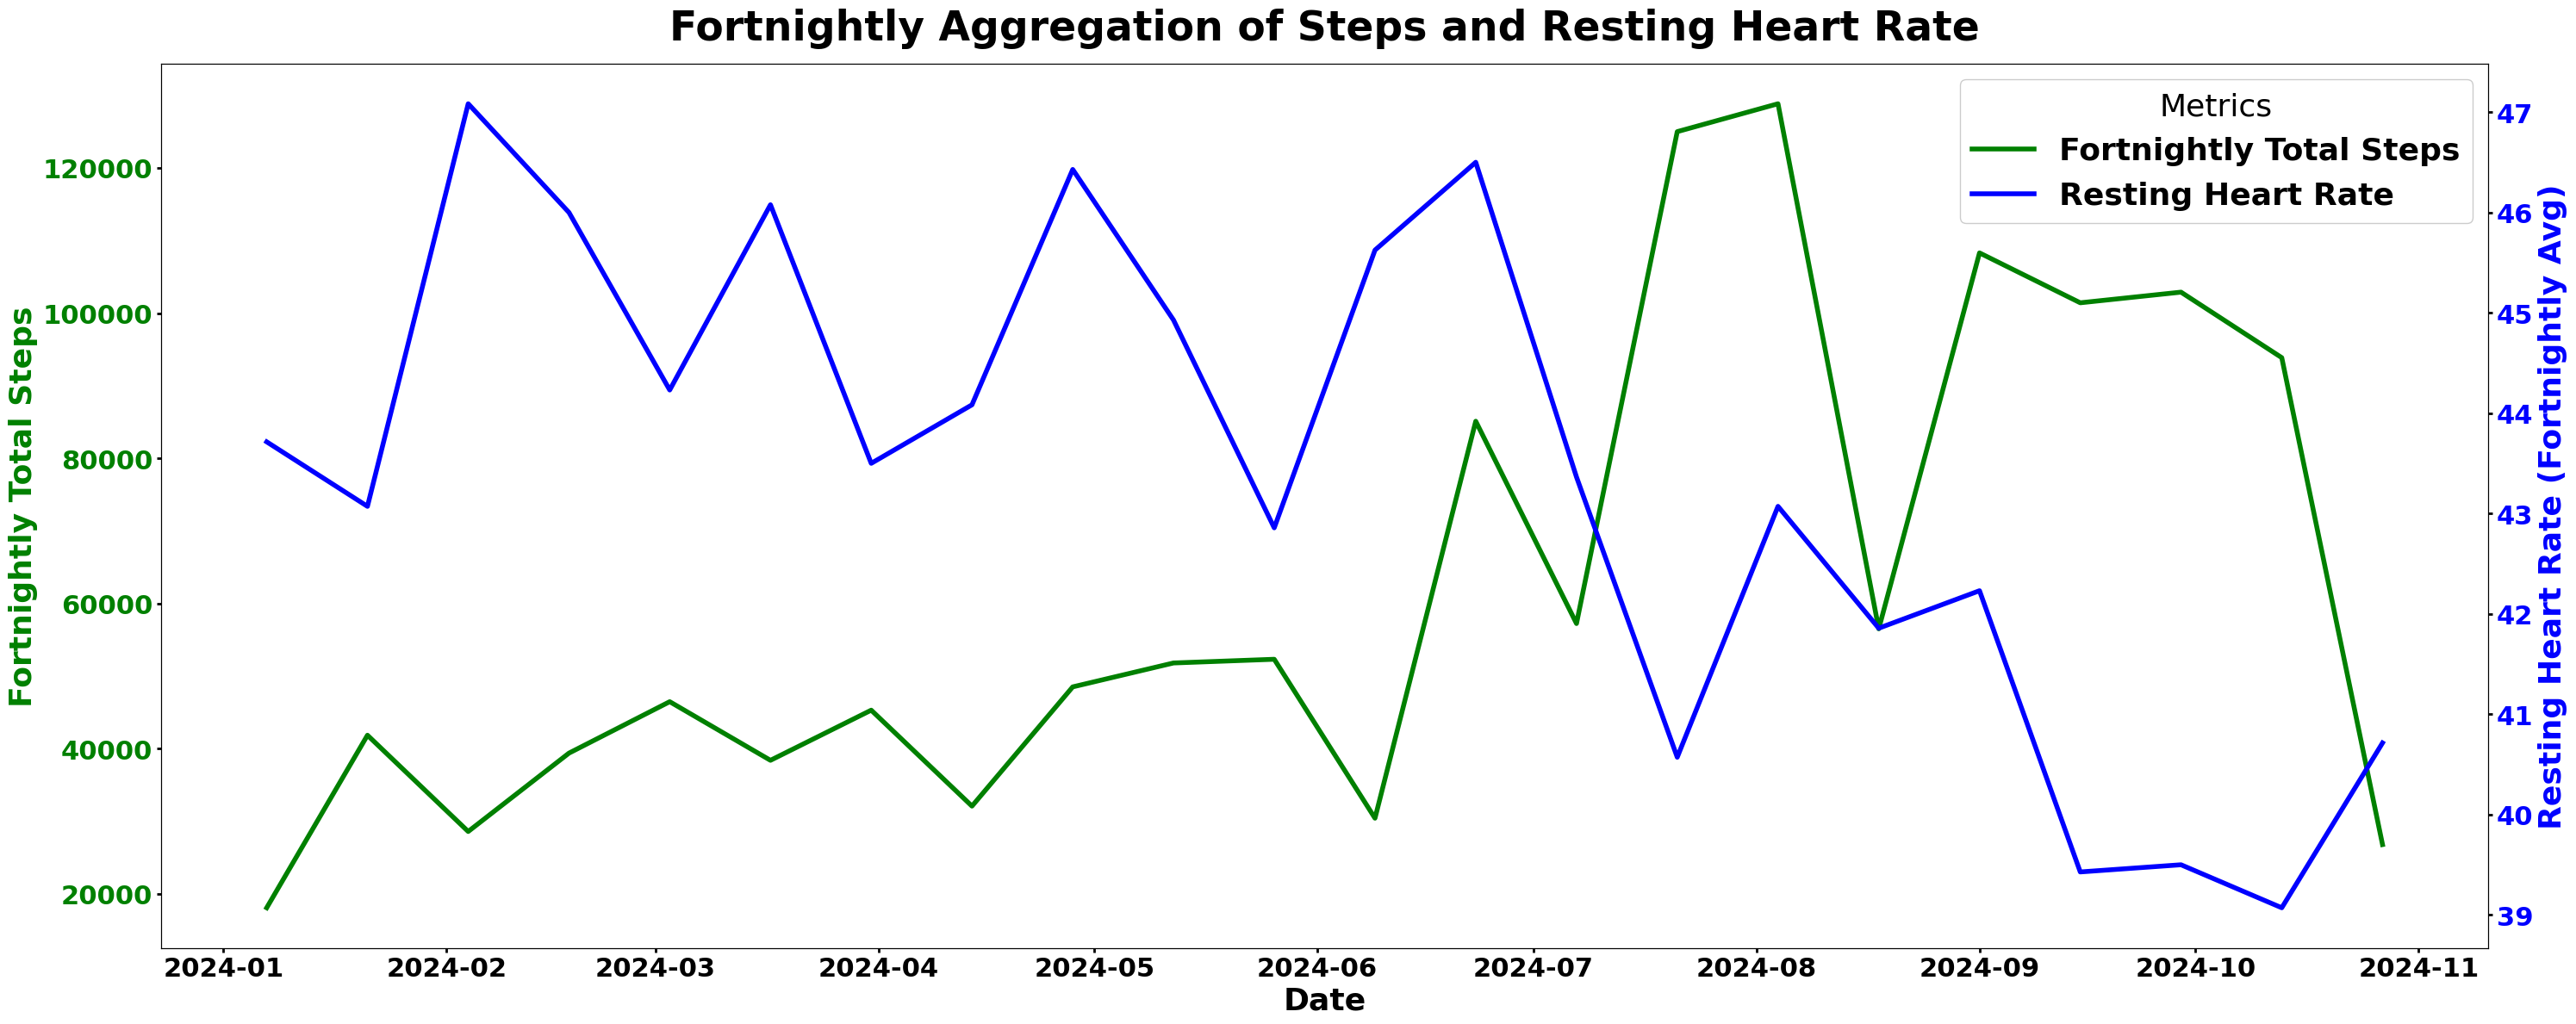

In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming 'df' is your Garmin DataFrame
# Filter relevant columns
df_filtered = df[['calendarDate', 'totalSteps', 'restingHeartRate']].dropna()

# Convert 'calendarDate' to datetime
df_filtered['calendarDate'] = pd.to_datetime(df_filtered['calendarDate'])

# Set 'calendarDate' as index and resample on a fortnightly level
df_filtered.set_index('calendarDate', inplace=True)
fortnightly_df = df_filtered.resample('2W').agg({'totalSteps': 'sum', 'restingHeartRate': 'mean'}).reset_index()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(30, 12))

# Plot steps data with bolder line
ax1.set_xlabel('Date', fontsize=26, fontweight='bold')
ax1.set_ylabel('Fortnightly Total Steps', color='green', fontsize=26, fontweight='bold')
line1 = sns.lineplot(x='calendarDate', y='totalSteps', data=fortnightly_df, ax=ax1, color='green', 
          linewidth=4, label='Fortnightly Total Steps')

ax1.tick_params(axis='y', labelcolor='green', labelsize=22, width=2)
ax1.tick_params(axis='x', labelsize=22, width=2)

# Make tick labels bold
plt.setp(ax1.get_xticklabels(), fontweight='bold')
plt.setp(ax1.get_yticklabels(), fontweight='bold')

# Create second y-axis for heart rate
ax2 = ax1.twinx()
ax2.set_ylabel('Resting Heart Rate (Fortnightly Avg)', color='blue', fontsize=26, fontweight='bold')
line2 = sns.lineplot(x='calendarDate', y='restingHeartRate', data=fortnightly_df, ax=ax2, color='blue', 
          linewidth=4, label='Resting Heart Rate', legend=False)  # Added legend=False here

ax2.tick_params(axis='y', labelcolor='blue', labelsize=22, width=2)

# Make right y-axis tick labels bold
plt.setp(ax2.get_yticklabels(), fontweight='bold')

# Set title with larger font and bold
plt.title('Fortnightly Aggregation of Steps and Resting Heart Rate', fontsize=34, fontweight='bold', pad=20)

# Create legend
lines = [line1.get_lines()[0], line2.get_lines()[0]]
labels = ['Fortnightly Total Steps', 'Resting Heart Rate']
leg = ax1.legend(lines, labels, loc='upper right', fontsize=26, 
               title='Metrics', title_fontsize=26, 
               frameon=True, framealpha=1)
plt.setp(leg.get_texts(), fontweight='bold')

# Remove any potential second legend
ax2.get_legend().remove() if ax2.get_legend() else None

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=22, fontweight='bold')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

In [216]:
# fortnightly_df

In [217]:
# df['restingHeartRate'].describe()

In [218]:
# df.columns

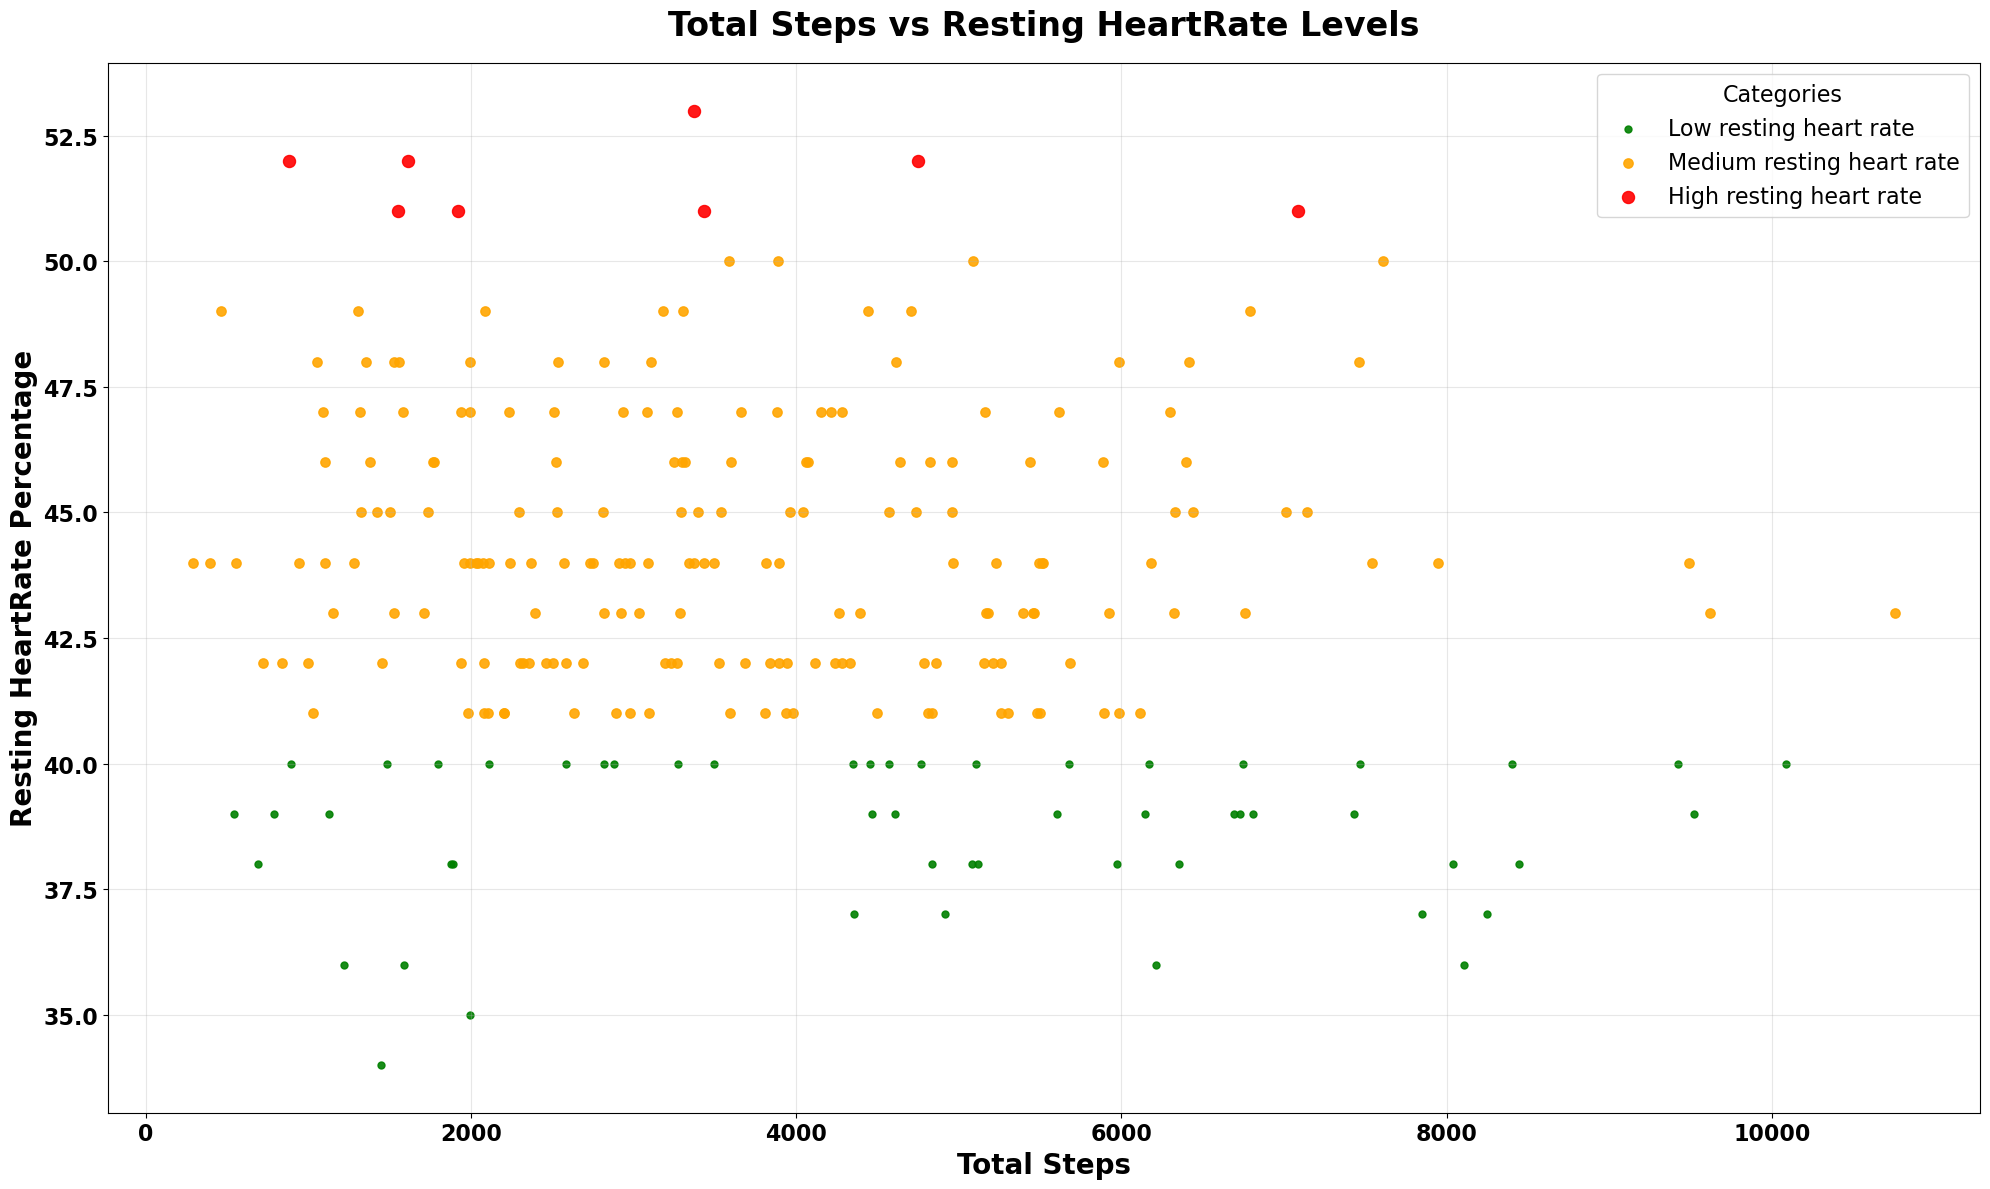

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

daily_df = df[['calendarDate', 'totalSteps', 'restingHeartRate']].copy()
daily_df['calendarDate'] = pd.to_datetime(daily_df['calendarDate'])

# Remove any infinite or null values
daily_df = daily_df.replace([np.inf, -np.inf], np.nan).dropna()

# Remove outliers using IQR method
Q1 = daily_df['totalSteps'].quantile(0.25)
Q3 = daily_df['totalSteps'].quantile(0.75)
IQR = Q3 - Q1
daily_df = daily_df[
    (daily_df['totalSteps'] >= Q1 - 1.5 * IQR) & 
    (daily_df['totalSteps'] <= Q3 + 1.5 * IQR)
]

# Create stress level categories
stress_bins = [0, 40, 50,100]
stress_labels = ['Low', 'Medium', 'High']
daily_df['restingHeartRate category'] = pd.cut(daily_df['restingHeartRate'], 
                                   bins=stress_bins, 
                                   labels=stress_labels)

# Create size mapping for stress categories
size_map = {'Low': 25, 'Medium': 45, 'High': 75}
daily_df['point_size'] = daily_df['restingHeartRate'].map(size_map)

# Create color mapping for stress categories
color_map = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
daily_df['point_color'] = daily_df['restingHeartRate'].map(color_map)

# Create scatter plot
plt.figure(figsize=(20, 12))

# Plot points for each category
for category in stress_labels:
    mask = daily_df['restingHeartRate category'] == category
    plt.scatter(daily_df[mask]['totalSteps'], 
               daily_df[mask]['restingHeartRate'],
               s=size_map[category],
               c=color_map[category],
               alpha=0.9,
               label=f'{category} resting heart rate')

# Customize plot
plt.xlabel('Total Steps', fontsize=20, fontweight='bold')
plt.ylabel('Resting HeartRate Percentage', fontsize=20, fontweight='bold')
plt.title('Total Steps vs Resting HeartRate Levels', fontsize=24, fontweight='bold', pad=20)

# Customize ticks and legend
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.legend(fontsize=16, title='Categories', title_fontsize=16)

# Add grid for better readability
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# # Print summary statistics
# print("\nSummary Statistics:")
# print("==================")
# print(f"Total number of days: {len(daily_df)}")
# print("\nActive Hours Statistics:")
# print(daily_df['activeHours'].describe())
# print("\nStress Percentage Statistics:")
# print(daily_df['stressPercentage'].describe())
# print("\nStress Level Distribution:")
# print(daily_df['stress_category'].value_counts().sort_index())

### 2. Correlation Between Active Minutes and Stress Levels

In [220]:
df1 = df[df['includesActivityData']==True].reset_index(drop=True)

In [221]:
df1.columns

Index(['userProfileId', 'totalKilocalories', 'activeKilocalories',
       'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories',
       'consumedKilocalories', 'remainingKilocalories', 'totalSteps',
       'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters',
       'wellnessActiveKilocalories', 'netRemainingKilocalories',
       'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal',
       'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt',
       'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription',
       'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds',
       'sleepingSeconds', 'includesWellnessData', 'includesActivityData',
       'includesCalorieConsumedData', 'privacyProtected',
       'moderateIntensityMinutes', 'vigorousIntensityMinutes',
       'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended',
       'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal',

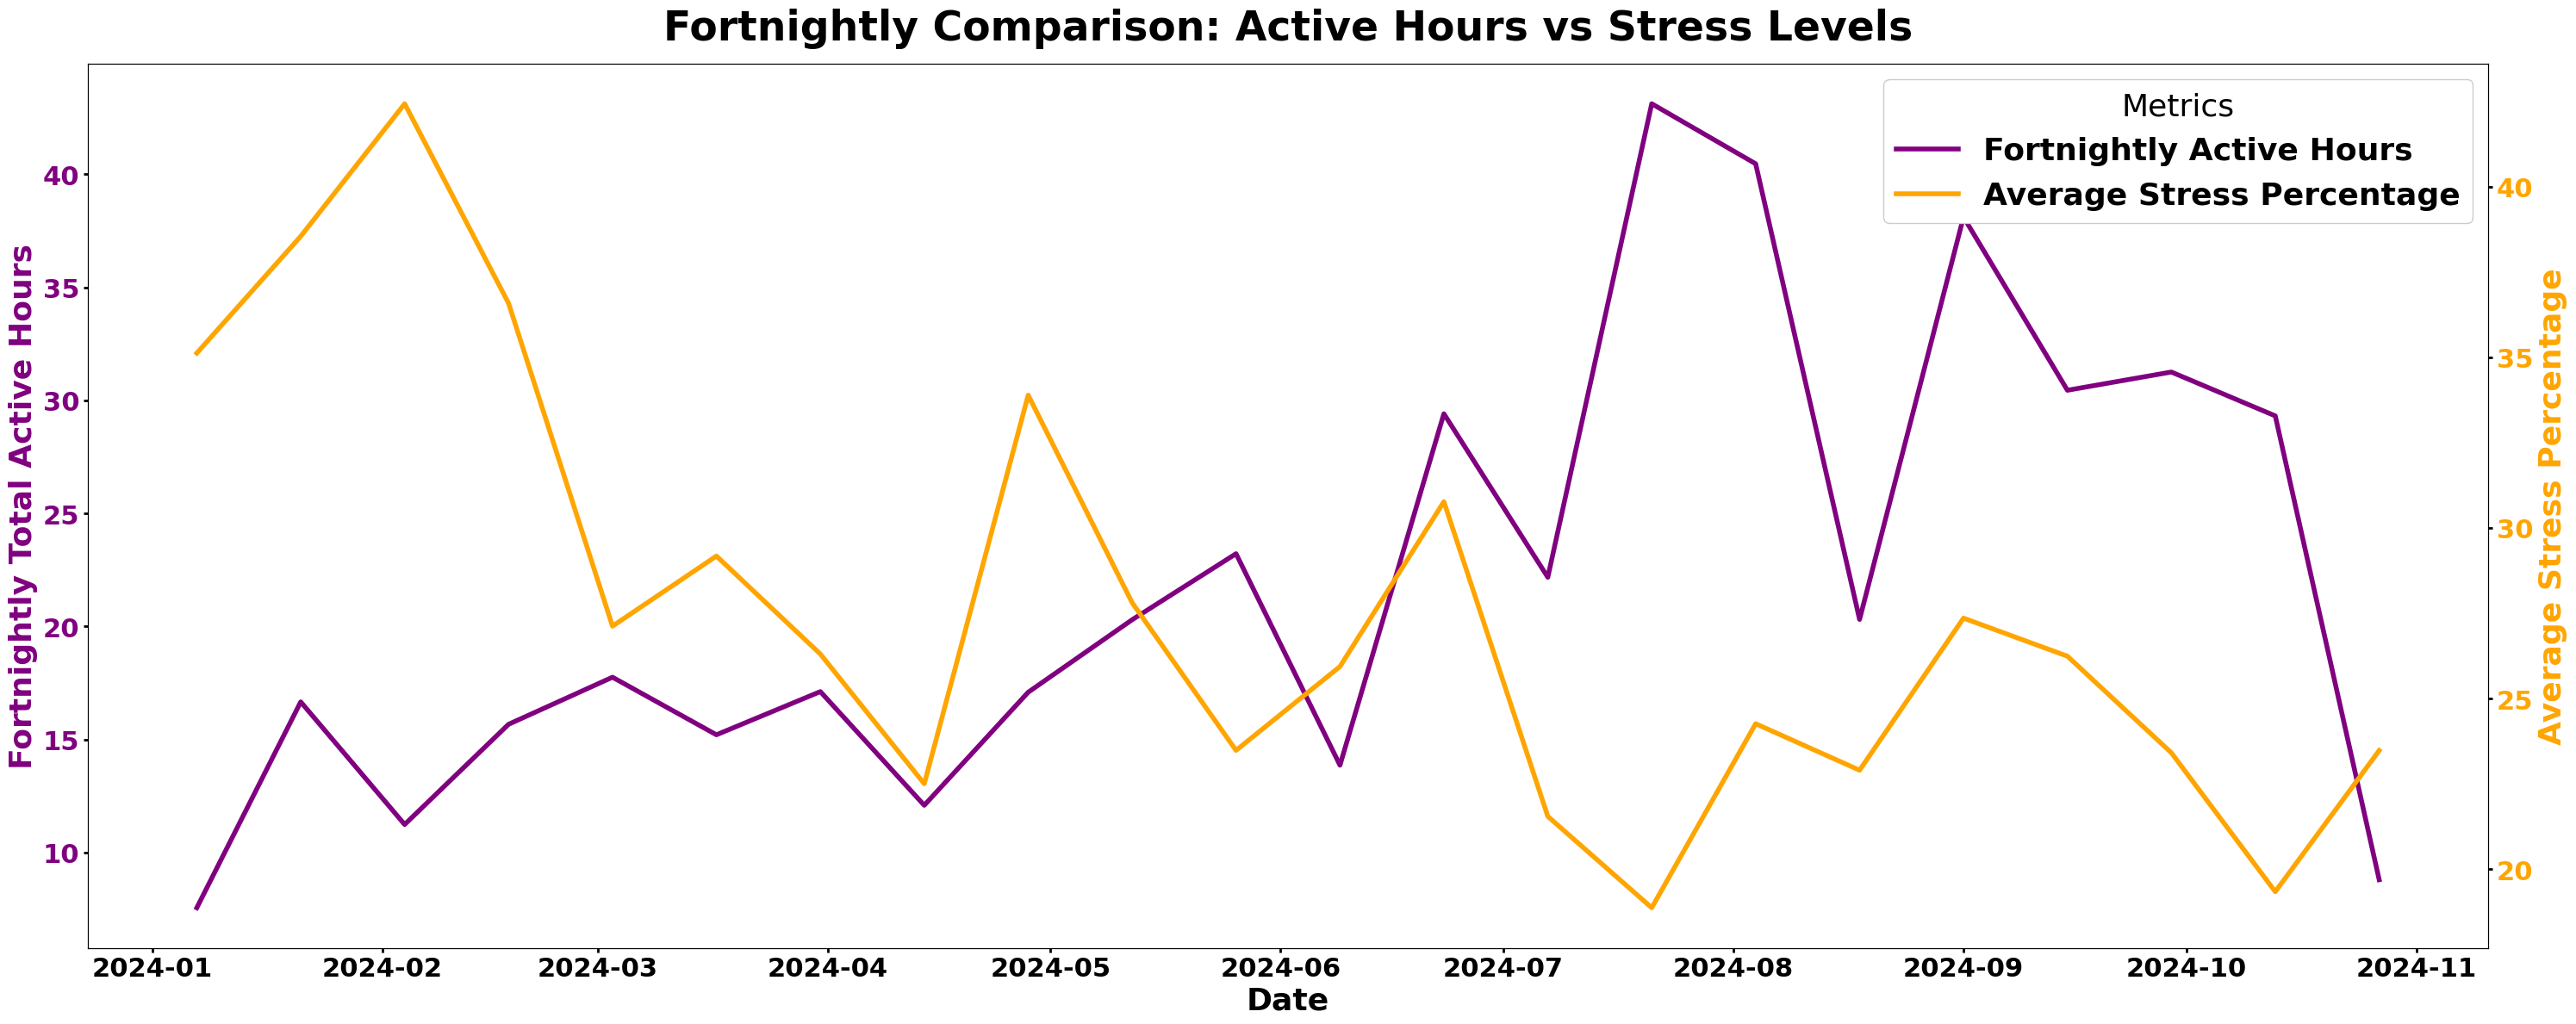

In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# First Plot: Fortnightly Line Plot
# Convert active seconds to hours and prepare the data
df['activeHours'] = (df['activeSeconds'] + df['highlyActiveSeconds']) / 3600

# Create filtered dataframe
df_filtered = df[['calendarDate', 'activeHours', 'stressPercentage']].dropna()
df_filtered['calendarDate'] = pd.to_datetime(df_filtered['calendarDate'])
df_filtered.set_index('calendarDate', inplace=True)

# Resample to fortnightly
fortnightly_df = df_filtered.resample('2W').agg({
    'activeHours': 'sum',
    'stressPercentage': 'mean'
}).reset_index()

# Create figure and axis for the first plot
fig1, ax1 = plt.subplots(figsize=(30, 12))

# Plot active hours
ax1.set_xlabel('Date', fontsize=26, fontweight='bold')
ax1.set_ylabel('Fortnightly Total Active Hours', color='purple', fontsize=26, fontweight='bold')
line1 = sns.lineplot(x='calendarDate', y='activeHours', data=fortnightly_df, ax=ax1, color='purple', 
                     linewidth=4, label='Fortnightly Active Hours')
ax1.tick_params(axis='y', labelcolor='purple', labelsize=22, width=2)
ax1.tick_params(axis='x', labelsize=22, width=2)

# Make tick labels bold
plt.setp(ax1.get_xticklabels(), fontweight='bold')
plt.setp(ax1.get_yticklabels(), fontweight='bold')

# Create second y-axis for stress
ax2 = ax1.twinx()
ax2.set_ylabel('Average Stress Percentage', color='orange', fontsize=26, fontweight='bold')
line2 = sns.lineplot(x='calendarDate', y='stressPercentage', data=fortnightly_df, ax=ax2, color='orange', 
                     linewidth=4, label='Stress Percentage', legend=False)
ax2.tick_params(axis='y', labelcolor='orange', labelsize=22, width=2)

# Make right y-axis tick labels bold
plt.setp(ax2.get_yticklabels(), fontweight='bold')

# Set title
plt.title('Fortnightly Comparison: Active Hours vs Stress Levels', fontsize=34, fontweight='bold', pad=20)

# Create legend
lines = [line1.get_lines()[0], line2.get_lines()[0]]
labels = ['Fortnightly Active Hours', 'Average Stress Percentage']
leg = ax1.legend(lines, labels, loc='upper right', fontsize=26, 
                 title='Metrics', title_fontsize=26, 
                 frameon=True, framealpha=1)
plt.setp(leg.get_texts(), fontweight='bold')

# Remove potential second legend
ax2.get_legend().remove() if ax2.get_legend() else None

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()

In [223]:
# daily_df[~daily_df['stressPercentage'].isna()].reset_index(drop=True)['stressPercentage'].describe()

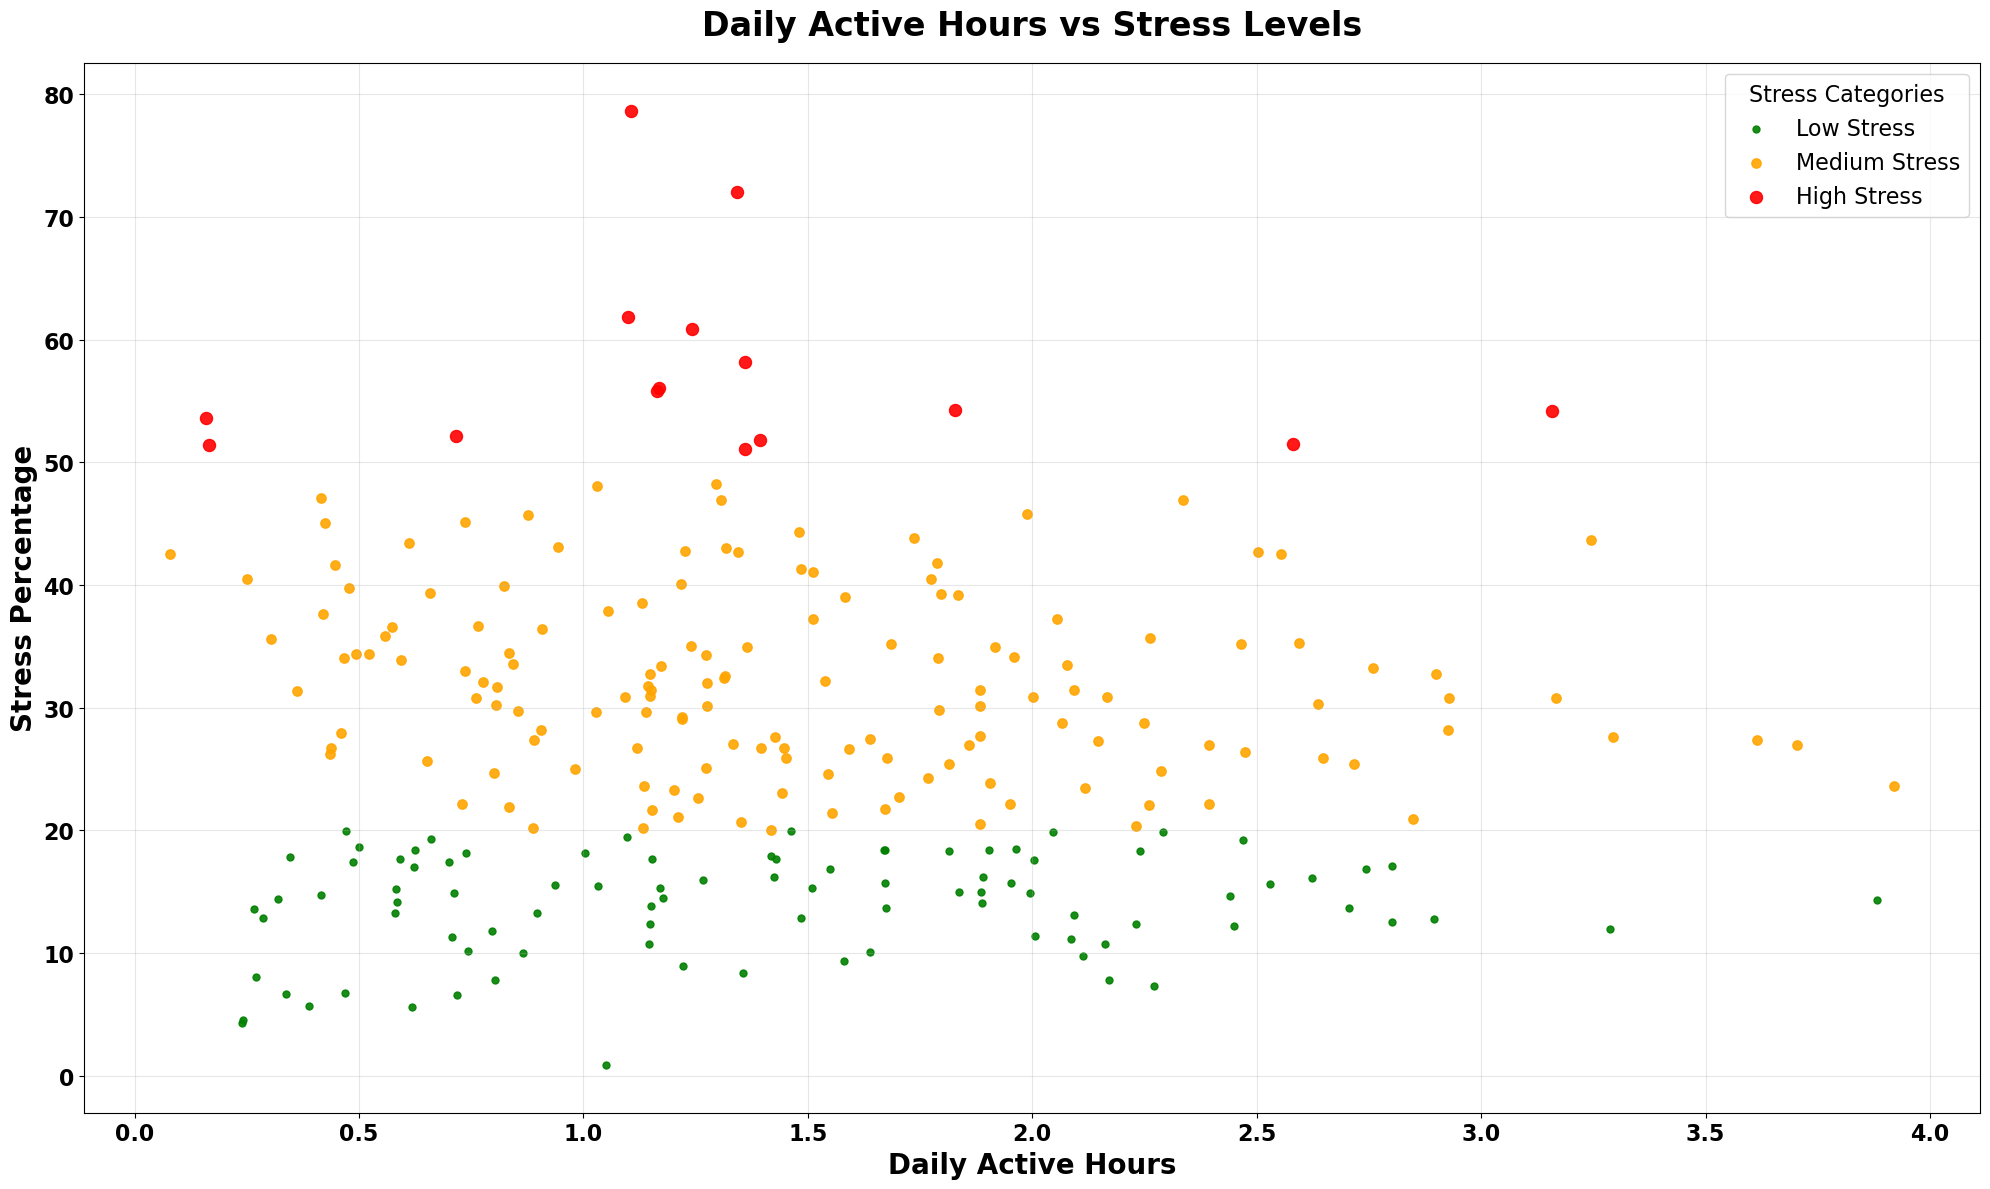


Summary Statistics:
Total number of days: 259

Active Hours Statistics:
count    259.000000
mean       1.458403
std        0.784870
min        0.080000
25%        0.834167
50%        1.344167
75%        1.956250
max        3.919167
Name: activeHours, dtype: float64

Stress Percentage Statistics:
count    259.000000
mean      27.023707
std       13.100184
min        0.860000
25%       16.915000
50%       26.360000
75%       34.720000
max       78.680000
Name: stressPercentage, dtype: float64

Stress Level Distribution:
stress_category
Low        92
Medium    152
High       15
Name: count, dtype: int64


In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

daily_df = df[['calendarDate', 'activeHours', 'stressPercentage']].copy()
daily_df['calendarDate'] = pd.to_datetime(daily_df['calendarDate'])

# Remove any infinite or null values
daily_df = daily_df.replace([np.inf, -np.inf], np.nan).dropna()

# Remove outliers using IQR method
Q1 = daily_df['activeHours'].quantile(0.25)
Q3 = daily_df['activeHours'].quantile(0.75)
IQR = Q3 - Q1
daily_df = daily_df[
    (daily_df['activeHours'] >= Q1 - 1.5 * IQR) & 
    (daily_df['activeHours'] <= Q3 + 1.5 * IQR)
]

# Create stress level categories
stress_bins = [0, 20, 50,100]
stress_labels = ['Low', 'Medium', 'High']
daily_df['stress_category'] = pd.cut(daily_df['stressPercentage'], 
                                   bins=stress_bins, 
                                   labels=stress_labels)

# Create size mapping for stress categories
size_map = {'Low': 25, 'Medium': 45, 'High': 75}
daily_df['point_size'] = daily_df['stress_category'].map(size_map)

# Create color mapping for stress categories
color_map = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
daily_df['point_color'] = daily_df['stress_category'].map(color_map)

# Create scatter plot
plt.figure(figsize=(20, 12))

# Plot points for each category
for category in stress_labels:
    mask = daily_df['stress_category'] == category
    plt.scatter(daily_df[mask]['activeHours'], 
               daily_df[mask]['stressPercentage'],
               s=size_map[category],
               c=color_map[category],
               alpha=0.9,
               label=f'{category} Stress')

# Customize plot
plt.xlabel('Daily Active Hours', fontsize=20, fontweight='bold')
plt.ylabel('Stress Percentage', fontsize=20, fontweight='bold')
plt.title('Daily Active Hours vs Stress Levels', fontsize=24, fontweight='bold', pad=20)

# Customize ticks and legend
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.legend(fontsize=16, title='Stress Categories', title_fontsize=16)

# Add grid for better readability
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("==================")
print(f"Total number of days: {len(daily_df)}")
print("\nActive Hours Statistics:")
print(daily_df['activeHours'].describe())
print("\nStress Percentage Statistics:")
print(daily_df['stressPercentage'].describe())
print("\nStress Level Distribution:")
print(daily_df['stress_category'].value_counts().sort_index())

# EDA

In [36]:
df = garmin_data_df

In [108]:
df['sedentaryHours'] = df['sedentarySeconds']/3600
df['sleepingHours'] = df['sleepingSeconds']/3600
df['activeHours'] = df['activeSeconds']/3600
# df['sedentaryHours']/3600 = df['sedentarySeconds']/3600

In [176]:
# df[~df['abnormalHeartRateAlertsCount'].isna()][['includesActivityData','bodyBatteryDrainedValue','activeHours','sleepingHours',
#                                                 'totalSteps','maxHeartRate','stressPercentage','restingHeartRate',
#                                                 'bodyBatteryDrainedValue','bodyBatteryLowestValue']]

In [177]:
# df['highestRespirationValue'].describe()